In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib-scalebar

In [28]:
import numpy as np
import matplotlib.image as npimg
import matplotlib.pyplot as plt
import random
from skimage import exposure
from skimage.util import random_noise
from skimage import transform
import cv2
import matplotlib.gridspec as gridspec
from matplotlib_scalebar.scalebar import ScaleBar
#Install all the necesarry packs
!pip install SimpleITK
!pip install matplotlib-scalebar
import numpy as np
from skimage import io
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import os.path
from os import path
import re
import glob
import cv2
import matplotlib.image as npimg
import random
from matplotlib_scalebar.scalebar import ScaleBar
from PIL import Image

     |████████████████████████████████| 42.5MB 71kB/s 


In [4]:
import os
os.chdir('/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/Semantic-Segmentation-Suite/')
!ls

builders	    reduce_lr_v01	    Test
checkpoints	    reduce_tiramisu	    test2.py
constante_lr_v01    requirements.txt	    test.py
constante_tiramisu  results		    train2.py
docs		    sampling_constant_v00   train4drive.py
frontends	    sampling_reduce_v00     train.py
get_data_ready.py   SemSeg4Colab.ipynb	    utils
models		    SemSeg4Colab_MCG.ipynb
predict.py	    server_training.py


In [5]:
path2conslr = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/Semantic-Segmentation-Suite/constante_lr_v01/1210/'
path2redlr = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/Semantic-Segmentation-Suite/reduce_lr_v01/0940/'
path2sampcons = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/Semantic-Segmentation-Suite/sampling_constant_v00/1480/'
path2sampred = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/Semantic-Segmentation-Suite/sampling_reduce_v00/1480/'
path2data = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/clean_data/data4training/SEG/test/'
path25 =  '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/Semantic-Segmentation-Suite/constante_tiramisu/2980/'
path26 =  '/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/Semantic-Segmentation-Suite/reduce_tiramisu/3000/'

In [29]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
    return numpyImage

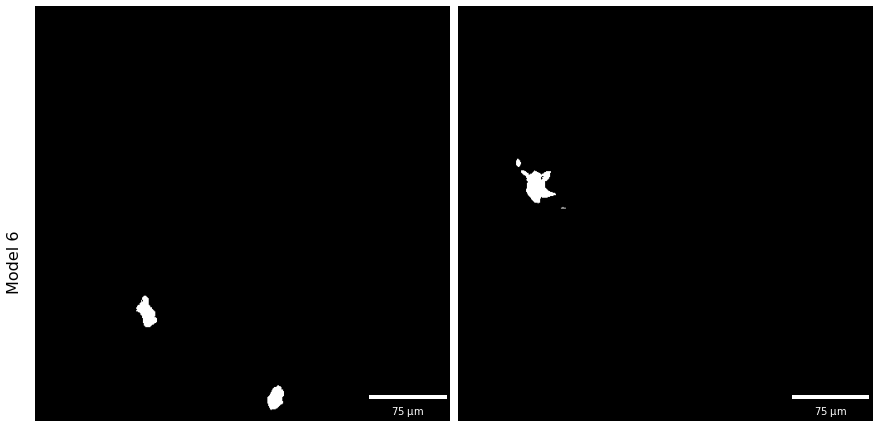

In [13]:
# im2chose = ['raw_110_pred.tif',  'raw_101_pred.tif','raw_260_pred.tif', 'raw_250_pred.tif']
# imgt = ['raw_110_gt.tif', 'raw_101_gt.tif',  'raw_260_gt.tif','raw_250_gt.tif']
# imor = ['raw_110.tif',  'raw_101.tif', 'raw_260.tif','raw_250.tif']
im2chose = ['raw_110_pred.tif',  'raw_101_pred.tif']
imgt = ['raw_110_gt.tif', 'raw_101_gt.tif']
imor = ['raw_110.tif',  'raw_101.tif']
fig, axs = plt.subplots(1,2,figsize=(15,10))


j=5
if j==0:
  for i in range(len(im2chose)):
      im = npimg.imread(path2data + imor[i])
      axs[i].imshow(im[:500 , 200:700], cmap = 'gray', vmin=0, vmax=im.max())
      axs[i].axis('off')
      axs = axs.flatten()
      scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right',box_alpha=0)
      axs[i].add_artist(scalebar)

  # axs[0].set_title('Original image',fontsize=16, rotation='vertical', x=-0.05,y=0.2)
  plt.subplots_adjust(wspace=0.02, hspace=0)
  fig.savefig('/content/original.png', dpi=300, transparent= True)
elif j==1:
  for i in range(len(im2chose)):
      imggt = npimg.imread(path2sampcons + imgt[i])
      axs[i].imshow(imggt[:500 , 200:700], cmap='gray')
      axs[i].axis('off')
      axs = axs.flatten()
      scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
      axs[i].add_artist(scalebar)
  plt.subplots_adjust(wspace=0.02, hspace=0)
  axs[0].set_title('Ground truth',fontsize=16, rotation='vertical', x=-0.05,y=0.3)

  fig.savefig('/content/gt.png', dpi=300, transparent= True)
elif j==2:
  for i in range(len(im2chose)):
      imgsampcons = npimg.imread(path2sampcons + im2chose[i])
      axs[i].imshow(imgsampcons[:500 , 200:700], cmap='gray')
      axs[i].axis('off')
      axs = axs.flatten()
      scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
      axs[i].add_artist(scalebar)
  axs[0].set_title('Model 3',fontsize=16, rotation='vertical', x=-0.05,y=0.3)
  plt.subplots_adjust(wspace=0.02, hspace=0)
  fig.savefig('/content/mod3.png', dpi=300, transparent= True)
elif j==3:
  for i in range(len(im2chose)):
      imgsampred = npimg.imread(path2sampred + im2chose[i])
      axs[i].imshow(imgsampred[:500 , 200:700], cmap='gray')
      axs[i].axis('off')
      axs = axs.flatten()
      scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
      axs[i].add_artist(scalebar)
  axs[0].set_title('Model 4',fontsize=16, rotation='vertical', x=-0.05,y=0.3)
  plt.subplots_adjust(wspace=0.02, hspace=0)
  fig.savefig('/content/mod4.png', dpi=300, transparent= True)

elif j==4:
  for i in range(len(im2chose)):
      imgsampred = npimg.imread(path25+ im2chose[i])
      axs[i].imshow(imgsampred[:500 , 200:700] , cmap='gray')
      axs[i].axis('off')
      axs = axs.flatten()
      scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
      axs[i].add_artist(scalebar)
  axs[0].set_title('Model 5',fontsize=16, rotation='vertical', x=-0.05,y=0.3)
  plt.subplots_adjust(wspace=0.02, hspace=0)
  fig.savefig('/content/mod5.png', dpi=300, transparent= True)

elif j==5:
  for i in range(len(im2chose)):
      imgsampred = npimg.imread(path26 + im2chose[i])
      axs[i].imshow(imgsampred[:500 , 200:700], cmap='gray')
      axs[i].axis('off')
      axs = axs.flatten()
      scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
      axs[i].add_artist(scalebar)
  axs[0].set_title('Model 6',fontsize=16, rotation='vertical', x=-0.05,y=0.3)
  plt.subplots_adjust(wspace=0.02, hspace=0)
  fig.savefig('/content/mod6.png', dpi=300, transparent= True)



0
(15, 983, 985)


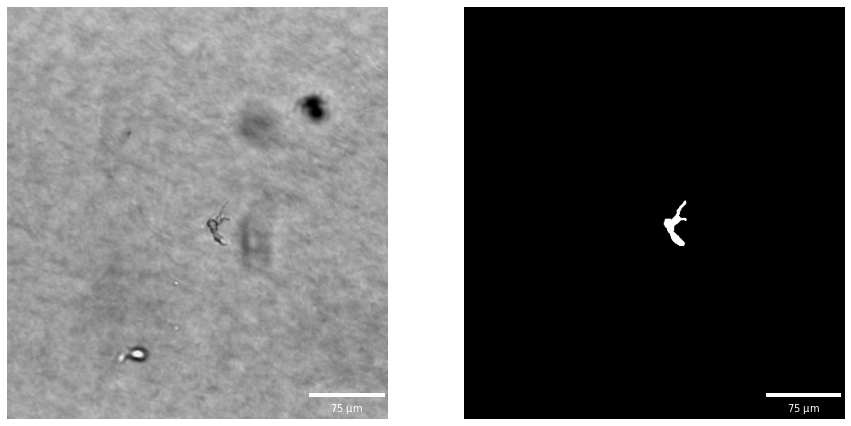

In [41]:
im= load_itk_image('/content/drive/My Drive/TFG/TFG MARINA CALZADA/clean_data/data4training/train/inputs/5000_6-15-14_1_xy005_stackreg_072-086.tif')
imgt = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/clean_data/data4training/train/labels/5000_6-15-14_1_xy005_072-086_Segmentationim-label.tif'
fig, axs = plt.subplots(1,2,figsize=(15,10))

axs[0].imshow(im[0,:512,512:], cmap = 'gray', vmin=0, vmax=im.max())
axs[0].axis('off')
axs = axs.flatten()
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right',box_alpha=0)
axs[0].add_artist(scalebar)
imggt = load_itk_image(imgt)
print(imggt.min())
print(imggt.shape)
axs[1].imshow(imggt[0,:512,512:],cmap='gray')
axs[1].axis('off')
axs = axs.flatten()
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
axs[1].add_artist(scalebar)

fig.savefig('/content/patch2.png', dpi=300, transparent= True)




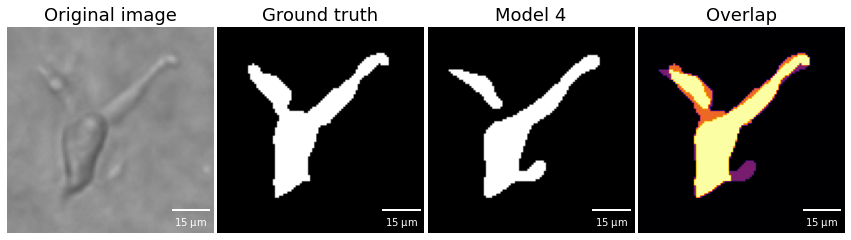

In [36]:
im2chose = ['raw_107_pred.tif']
imgt = ['raw_107_gt.tif']
imor = ['raw_107.tif']
fig, axs = plt.subplots(1,4,figsize=(15,10))
i=0
im = npimg.imread(path2data + imor[i])
axs[0].imshow(im[580:680 , :100], cmap = 'gray', vmin=0, vmax=im.max())
axs[0].axis('off')
axs = axs.flatten()
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right',box_alpha=0)
axs[0].add_artist(scalebar)
axs[0].set_title('Original image',fontsize=18)
plt.subplots_adjust(wspace=0.02, hspace=0)

imggt = npimg.imread(path2sampcons + imgt[i])
axs[1].imshow(imggt[580:680 , :100], cmap='gray')
axs[1].axis('off')
axs = axs.flatten()
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
axs[1].add_artist(scalebar)
plt.subplots_adjust(wspace=0.02, hspace=0)
axs[1].set_title('Ground truth',fontsize=18)
imggt = cv2.imread(path2sampcons + imgt[i])[:,:,0]
#   # fig.savefig('/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/showimage/gt.png', dpi=300, transparent= True)
# # elif j==2:
# #   for i in range(len(im2chose)):
# #       imgsampcons = npimg.imread(path2sampcons + im2chose[i])
# #       axs[i].imshow(imgsampcons[:500 , 200:700], cmap='gray')
# #       axs[i].axis('off')
# #       axs = axs.flatten()
# #   axs[0].set_title('Model 3',fontsize=16, rotation='vertical', x=-0.05,y=0.3)
# #   plt.subplots_adjust(wspace=0.02, hspace=0)
# #   # fig.savefig('/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/showimage/mod3.png', dpi=300, transparent= True)
imgsampred = npimg.imread(path2sampred + im2chose[i])
axs[2].imshow(imgsampred[580:680 , :100], cmap='gray')
axs[2].axis('off')
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
axs[2].add_artist(scalebar)
axs = axs.flatten()
axs[2].set_title('Model 4',fontsize=18)
plt.subplots_adjust(wspace=0.02, hspace=0)
# fig.savefig('/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/showimage/mod4.png', dpi=300, transparent= True)

imggt[imggt>0.5]=2
imres = imgsampred+imggt
np.unique(imres)
axs[3].imshow(imres[580:680 , :100], cmap='inferno')
axs[3].axis('off')
axs = axs.flatten()
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
axs[3].add_artist(scalebar)
axs[3].set_title('Overlap',fontsize=18)
plt.subplots_adjust(wspace=0.02, hspace=0)


fig.savefig('/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/overlap.pdf', dpi=300, transparent= True)


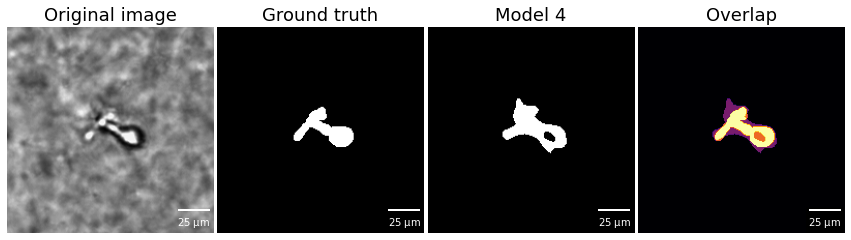

In [ ]:
im2chose = ['raw_193_pred.tif']
imgt = ['raw_193_gt.tif']
imor = ['raw_193.tif']
fig, axs = plt.subplots(1,4,figsize=(15,10))
i=0
im = npimg.imread(path2data + imor[i])
axs[0].imshow(im[430:630 , 425:625], cmap = 'gray', vmin=0, vmax=im.max())
axs[0].axis('off')
axs = axs.flatten()
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right',box_alpha=0)
axs[0].add_artist(scalebar)
axs[0].set_title('Original image',fontsize=18)
plt.subplots_adjust(wspace=0.02, hspace=0)

imggt = npimg.imread(path2sampcons + imgt[i])
axs[1].imshow(imggt[430:630 , 425:625], cmap='gray')
axs[1].axis('off')
axs = axs.flatten()
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
axs[1].add_artist(scalebar)
plt.subplots_adjust(wspace=0.02, hspace=0)
axs[1].set_title('Ground truth',fontsize=18)
imggt = cv2.imread(path2sampcons + imgt[i])[:,:,0]

imgsampred = npimg.imread(path2sampred + im2chose[i])
axs[2].imshow(imgsampred[430:630 , 425:625], cmap='gray')
axs[2].axis('off')
axs = axs.flatten()
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
axs[2].add_artist(scalebar)
axs[2].set_title('Model 4',fontsize=18)
plt.subplots_adjust(wspace=0.02, hspace=0)

imggt[imggt>0.5]=2
imres = imgsampred+imggt
np.unique(imres)
axs[3].imshow(imres[430:630 , 425:625], cmap='inferno')
axs[3].axis('off')
scalebar = ScaleBar(0.8,'um', color='w', box_color='k', height_fraction=0.01, location='lower right')
axs[3].add_artist(scalebar)
axs = axs.flatten()
axs[3].set_title('Overlap',fontsize=18)
plt.subplots_adjust(wspace=0.02, hspace=0)


fig.savefig('/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/overlap_2.pdf', dpi=300, transparent= True)

In [ ]:
def jaccard_index (y_pred, y_true):
    intersection = y_true*y_pred
    intersection = intersection.astype(np.float)
    union = y_true + y_pred - intersection
    union = union.astype(np.float)
    if np.sum(union) == 0.0:
        return 1.0
    else:
        return np.sum(intersection)/np.sum(union)

imggt = npimg.imread(path2sampcons + imgt[i])
gt_tile = imggt[430:630 , 425:625]
pred = imgsampred[430:630 , 425:625]
ja = jaccard_index(pred, gt_tile)
print(ja)


0.5840395480225988


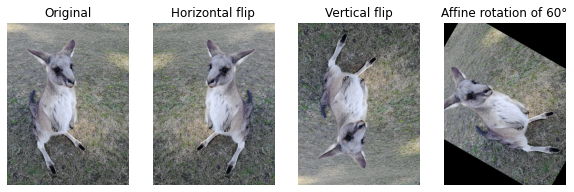

In [ ]:
img=npimg.imread('/content/WhatsApp Image 2020-06-11 at 21.14.59.jpeg')
horiz_flip = cv2.flip(img, 1)
ver_flip = cv2.flip(img, 0)
angle = 60
M = cv2.getRotationMatrix2D((img.shape[1] // 2, img.shape[0] // 2), angle, 1.0)
affine = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]),
                                     flags=cv2.INTER_NEAREST)

fig, axs = plt.subplots(1,4, figsize=(10,10))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(horiz_flip)
axs[1].set_title('Horizontal flip')
axs[2].imshow(ver_flip)
axs[2].set_title('Vertical flip')
axs[3].imshow(affine)
axs[3].set_title('Affine rotation of 60°')
# axs[1,1].set_yticklabels([])
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
fig.savefig('data_augmentation.png')

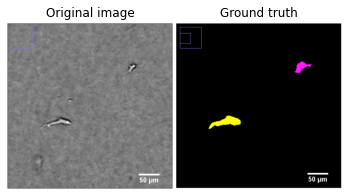

In [ ]:
path2gt = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/clean_data/memoria/'
path2data = '/content/drive/My Drive/TFG/TFG MARINA CALZADA/clean_data/memoria/'
imgt = ['gtscale.png']
imor = ['orignialscale.png']
fig, axs = plt.subplots(1,2)

im = npimg.imread('/content/drive/My Drive/TFG/TFG MARINA CALZADA/clean_data/memoria/originalscale.png')
axs[0].imshow(im, cmap = 'Greys', vmin=0, vmax=im.max())
axs[0].axis('off')
axs = axs.flatten()
axs[0].set_title('Original image',fontsize=12)
imggt = npimg.imread('/content/drive/My Drive/TFG/TFG MARINA CALZADA/clean_data/memoria/gtscale.png')
axs[1].imshow(imggt, cmap='cubehelix')
axs[1].axis('off')
axs = axs.flatten()
plt.subplots_adjust(wspace=0.02, hspace=0)
axs[1].set_title('Ground truth',fontsize=12)
fig.savefig('/content/drive/My Drive/TFG/TFG MARINA CALZADA/Seg_github/eval_data_server/original+ground.pdf', dpi=300, transparent= True)


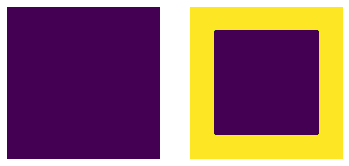

In [ ]:
original = np.ones((500,500))
fig, axs = plt.subplots(1,2)
axs[0].imshow(original)
axs[0].axis('off')
val=80
hal=original
hal[val:-val,val:-val]=-1
hal=original+hal
axs[1].imshow(hal,vmin=0,vmax=1)
axs[1].axis('off')
fig.savefig('Halo.pdf', dpi=300, transparent= True)